<a href="https://colab.research.google.com/github/thofes/judging_SJ_BA/blob/main/Mark_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

Mounted at /content.gdrive


In [114]:
#import json files 1680 and reshape Achtung data_labeled_01042022 bereits richtig geshaped

import os
import json
import numpy as np

PATH = "/content.gdrive/MyDrive/Datasets_1680"
sets = []
try:
    sets = next(os.walk(PATH))[2]
except StopIteration:
    pass

print(sets)
X = np.empty(shape=(0,1680))
y = np.empty(shape=0)

print(X,y)

for path in sets:
    path = PATH + '/' + path
    with open(path, "r") as fp:
        data1 = json.load(fp)

    # convert lists to numpy arrays
    X1 = np.array(data1["keypoints"])
    #X = np.array(data["mfcc"])
    y1 = np.array(data1["labels"])
    X1 = np.reshape(X1, (y1.shape[0],1680))
    X = np.concatenate((X,X1), axis=0)
    y = np.concatenate((y,y1), axis=0)



print(X.shape)
print(y.shape)

#with np.printoptions(threshold=np.inf):
    #print(X[0])



['data_Labeled_Max.json', 'data_Labeled_Mirror_Telemark_01042022.json', 'data_Labeled_Mirror_Telemark_09042022.json', 'data_Labeled_09042022.json']
[] []
(750, 1680)
(750,)


In [115]:
# rearange array 5 BB 75 keypoints
import json
import numpy as np
"""
#merging json files
with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_Max.json', "r") as fp:
    data1 = json.load(fp)

# convert lists to numpy arrays
X = np.array(data1["keypoints"])
#X = np.array(data["mfcc"])
y = np.array(data1["labels"])
X = np.reshape(X, (y.shape[0],1680))

print(X[0][0])
"""
idx = list(range(0,105))
test = list(range(105,1680))
try1 =[]
print(idx)
print(test)

for i in range(21):
    try1.append(idx[(i*5):(i*5)+5])
    try1.append(test[(i*75):(i*75)+75])

print(try1)


flat_list = []
for sublist in try1:
    for item in sublist:
        flat_list.append(item)
"""
with np.printoptions(threshold=np.inf):
    X[0] = X[0][flat_list]
    print(X[0])
"""
for i, x in enumerate(X):
    X[i] = X[i][flat_list]

print(X.shape)
print(y.shape)

#with np.printoptions(threshold=np.inf):
    #print(X[0])








[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [113]:
#Creating binary classification model 1680
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Conv1D, Dropout, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, binary_crossentropy
from sklearn.utils import shuffle

 
model = Sequential([
    Conv1D(filters=32, kernel_size=4, input_shape=(1680,1), padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(pool_size=4, strides=4), #max wert der 3 stellen und dann 3 stellen weiter wandern
    Conv1D(filters=64, kernel_size=21, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(pool_size=21, strides=21),
    LSTM(20, activation='tanh'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid') #sigmoid
])


save_callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
def scheduler(epoche, lr):
      if epoche < 2:
          return lr
      else:
          return lr*0.97
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



model.summary()



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 1680, 32)          160       
                                                                 
 dropout_47 (Dropout)        (None, 1680, 32)          0         
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 420, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 420, 64)           43072     
                                                                 
 dropout_48 (Dropout)        (None, 420, 64)           0         
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                

In [2]:
#import json files 1575

import os
import json
import numpy as np

PATH = "/content.gdrive/MyDrive/Datasets_1575"
sets = []
try:
    sets = next(os.walk(PATH))[2]
except StopIteration:
    pass

print(sets)
X = np.empty(shape=(0,1575))
y = np.empty(shape=0)



for path in sets:
    path = PATH + '/' + path
    with open(path, "r") as fp:
        data1 = json.load(fp)

    # convert lists to numpy arrays
    X1 = np.array(data1["keypoints"])
    #X = np.array(data["mfcc"])
    y1 = np.array(data1["labels"])

    X = np.concatenate((X,X1), axis=0)
    y = np.concatenate((y,y1), axis=0)



print(X.shape)
print(y.shape)

['data_manually_labeled_original.json', 'data_manually_labled_Telemark_mirror.json', 'data_Manually_Labeled_09042022.json', 'data_Manually_Labeled_mirror_09042022.json', 'data_Manually_Labeled_11042022.json']
(1082, 1575)
(1082,)


In [41]:
#Creating binary classification model 1575
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Conv1D, Dropout, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, binary_crossentropy
from sklearn.utils import shuffle


model = Sequential([
    Conv1D(filters=32, kernel_size=3, input_shape=(1575,1), padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(pool_size=3, strides=3), #max wert der 3 stellen und dann 3 stellen weiter wandern
    Conv1D(filters=64, kernel_size=25, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(pool_size=25, strides=25),
    LSTM(21, activation='tanh'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid') #sigmoid
])
"""
model = Sequential([
    Conv1D(filters=32, kernel_size=3, input_shape=(1575,1), padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(), #max wert der 2 stellen und dann 2 stellen weiter wandern (stides = pool Size default)
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(),
    Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(),
    Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(), 
    Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(),        
    LSTM(21, activation='tanh'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid') #sigmoid
])
"""
save_callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
def scheduler(epoche, lr):
      if epoche < 2:
          return lr
      else:
          return lr*0.97
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 1575, 32)          128       
                                                                 
 dropout_24 (Dropout)        (None, 1575, 32)          0         
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 525, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 525, 64)           51264     
                                                                 
 dropout_25 (Dropout)        (None, 525, 64)           0         
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 21, 64)           0         
 g1D)                                                 

In [42]:
history = model.fit(x=X, y=y, batch_size=40, validation_split = 0.2, epochs=1000, shuffle=True, verbose = 2, callbacks=[save_callback, lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/1000
22/22 - 8s - loss: 0.7097 - accuracy: 0.4936 - val_loss: 0.7517 - val_accuracy: 0.2258 - lr: 0.0010 - 8s/epoch - 349ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/1000
22/22 - 5s - loss: 0.6935 - accuracy: 0.5457 - val_loss: 0.7070 - val_accuracy: 0.3364 - lr: 0.0010 - 5s/epoch - 228ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0009700000460725278.
Epoch 3/1000
22/22 - 5s - loss: 0.6973 - accuracy: 0.5225 - val_loss: 0.7177 - val_accuracy: 0.2811 - lr: 9.7000e-04 - 5s/epoch - 227ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.000940900050336495.
Epoch 4/1000
22/22 - 5s - loss: 0.7018 - accuracy: 0.4925 - val_loss: 0.7276 - val_accuracy: 0.2442 - lr: 9.4090e-04 - 5s/epoch - 228ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.000912673061247915.
Epoch 5/1000
22/22 - 5s - loss: 0.6919 - accur

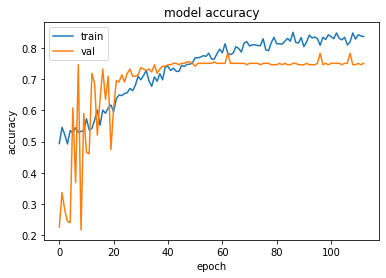

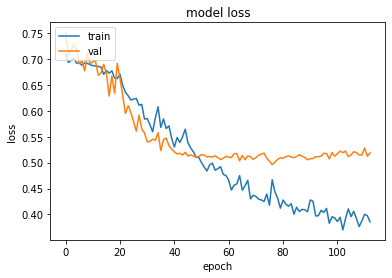

In [43]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
model = keras.models.load_model('/content.gdrive/MyDrive')

In [45]:
# Predict new Dataset to learn

with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_09042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X2 = np.array(data2["keypoints"])
y2 = np.array(data2["labels"])
print(y2)
print(X2[0:1].shape)
print(X2[0:1])

predictions = model.predict(X2, batch_size = 10, verbose =0)
print(predictions)
counter = 0
for i, x in enumerate(predictions):
    if np.around(x) != y2[i]:
        print("wrong")
        counter += 1

print("error:" , counter / y2.shape[0])
print(type(predictions))
y3 = np.around(predictions)
y3 = np.reshape(y3, (X2.shape[0]))
print(y3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(1, 1575)
[[0.         0.         0.         ... 0.41105416 0.75302452 0.73161852]]
[[0.29595634]
 [0.1733788 ]
 [0.2066136 ]
 [0.12075743]
 [0.27811733]
 [0.24224457]
 [0.31926638]
 [0.30953616]
 [0.49361354]
 [0.30546921]
 [0.31209114]
 [0.3026772 ]
 [0.11944246]
 [0.23022702]
 [0.23193654]
 [0.24261305]
 [0.19923738]
 [0.13036716]
 [0.39132488]
 [0.38293043]
 [0.19547188]
 [0.17494902]
 [0.34403962]
 [0.3559302 ]
 [0.1470536 ]
 [0

In [ ]:
import json
import numpy as np

#merging json files
with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_01042022.json', "r") as fp:
    data1 = json.load(fp)

# convert lists to numpy arrays
X = np.array(data1["keypoints"])
#X = np.array(data["mfcc"])
y = np.array(data1["labels"])
#print(X[0])
#print(X[332])
print(X.shape)
#print(y[0])
#print(y[332])
print(y.shape)

In [32]:
#import json files 1680 and reshape

import json
import numpy as np

#merging json files
with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_09042022.json', "r") as fp:
    data1 = json.load(fp)

# convert lists to numpy arrays
X = np.array(data1["keypoints"])
#X = np.array(data["mfcc"])
y = np.array(data1["labels"])
X = np.reshape(X, (y.shape[0],1680))


with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_Max.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_Mirror_Telemark_01042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_Mirror_Telemark_09042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)
"""
with open('/content.gdrive/MyDrive/Datasets_1575/data_manually_labled_Telemark_mirror.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)
"""




#print(X[0])
#print(X[332])
print(X.shape)
#print(y[0])
#print(y[332])
print(y.shape)

(750, 1680)
(750,)


In [14]:
#import json files 1575

import json
import numpy as np

#merging json files
with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_09042022.json', "r") as fp:
    data1 = json.load(fp)

# convert lists to numpy arrays
X = np.array(data1["keypoints"])
#X = np.array(data["mfcc"])
y = np.array(data1["labels"])

with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_11042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_mirror_09042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1575/data_manually_labeled_original.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1575/data_manually_labled_Telemark_mirror.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)





print(X[0])
print(X[332])
print(X.shape)
print(y[0])
print(y[332])
print(y.shape)

[0.         0.         0.         ... 0.41105416 0.75302452 0.73161852]
[0.         0.         0.         ... 0.54369467 0.74955374 0.53815782]
(1082, 1575)
1
1
(1082,)
